In [159]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [160]:
df1=pd.read_csv(('../Dataset/Bengaluru_House_Data.csv'))

In [161]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [163]:
df1.shape

(13320, 9)

In [164]:
df1=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [165]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [166]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [167]:
df1=df1.dropna()

In [168]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [169]:
# Function to extract numeric value from size column
import re  
def extract_number(size_str):
    match = re.search(r'\d+', size_str)
    if match:
        return int(match.group())
    return None

# Apply the function to the size column
df1['BHK'] = df1['size'].apply(extract_number)

In [170]:
df1['BHK'].unique()
df1['BHK'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: BHK
Non-Null Count  Dtype
--------------  -----
13246 non-null  int64
dtypes: int64(1)
memory usage: 207.0 KB


In [171]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [172]:
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [173]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [174]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None

In [175]:
convert_sqft_to_num('100-1000')

550.0

In [176]:
df1['total_sqrt_con']=df1['total_sqft'].apply(convert_sqft_to_num)

In [177]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13246 non-null  object 
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   BHK             13246 non-null  int64  
 6   total_sqrt_con  13200 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 827.9+ KB


In [179]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [180]:
df1['pps']=(df1['price']*100000)/df1['total_sqrt_con']
df1.head().round(2)

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.81
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.38
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.56
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.89
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.00


In [181]:
len(df1['location'].unique())

1304

In [182]:
location_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            534
Sarjapur  Road                                        392
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           233
                                                     ... 
bsk 6th stage 2ad block near sri conversation hall      1
beml layout, basaveshwara nagar                         1
basaveshwarnagar                                        1
banashankari stage iii sa                               1
asha township, off hennur road                          1
Name: location, Length: 1304, dtype: int64

In [183]:
len(location_stats[location_stats<=10])

1063

In [184]:
location_tstats_less_than10=location_stats[location_stats<=10]

In [185]:
df1['location']=df1['location'].apply(lambda x: 'other' if x in location_tstats_less_than10 else x)

In [186]:
len(df1['location'].unique())

242

<Axes: xlabel='bath'>

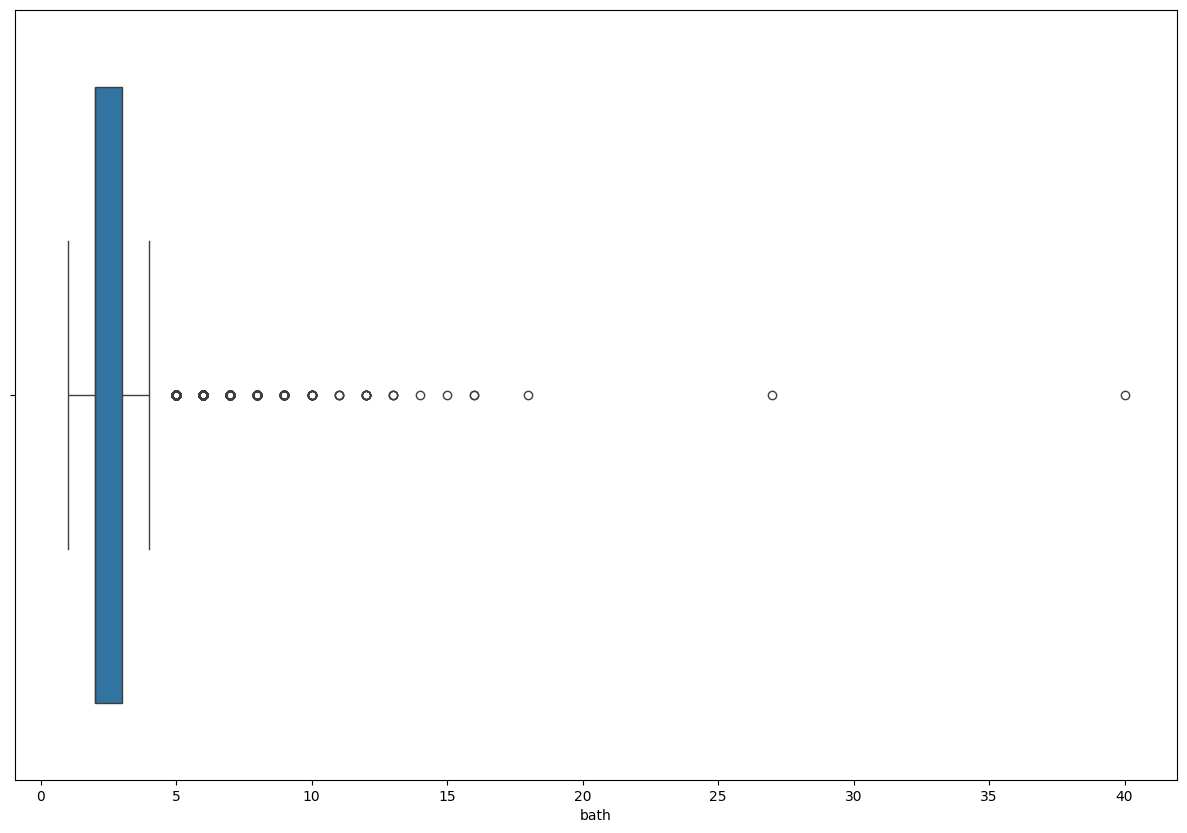

In [187]:
sns.boxplot(data=df1,x='bath')


In [188]:
#identify thAt which having less than 300 sqr feet rooms which impossible to ave in a home 
(df1[(df1['total_sqrt_con']/df1['BHK'])<300].head()).shape

(5, 8)

In [189]:
(df1[(df1['total_sqrt_con']/df1['BHK'])<300]).shape

(744, 8)

In [190]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  object 
 2   total_sqft      13246 non-null  object 
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   BHK             13246 non-null  int64  
 6   total_sqrt_con  13200 non-null  float64
 7   pps             13200 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 931.4+ KB


In [191]:
df1 = df1[(df1['total_sqrt_con'] / df1['BHK']) >= 300]
df1.shape

(12456, 8)

In [192]:
df1['pps'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: pps, dtype: float64

In [193]:
def remove_pps_outliers(df):
     df_out=pd.DataFrame()
     for key,subdf in df.groupby('location'):
         m=np.mean(subdf['pps'])
         st=np.std(subdf['pps'])
         reduced_df=subdf[(subdf['pps']>(m-st)) & (subdf['pps']<=(m+st))]
         df_out=pd.concat([df_out,reduced_df],ignore_index=True)
     return df_out         

In [194]:
df1.head(1)

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606


In [195]:
df1=remove_pps_outliers(df1)

In [196]:
df1.shape

(10244, 8)

In [197]:
import matplotlib.pyplot as plt 
import matplotlib 

In [198]:
def plot_scatter_chart(df,location):
    bhk2=df[(df['location']==location) & (df['BHK']==2)]
    bhk3=df[(df['location']==location) & (df['BHK']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqrt_con'],bhk2['pps'],color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3['total_sqrt_con'],bhk3['pps'],color='green',label='3 BHK',marker='+',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()


In [199]:
df1.head()
df1['location'].unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

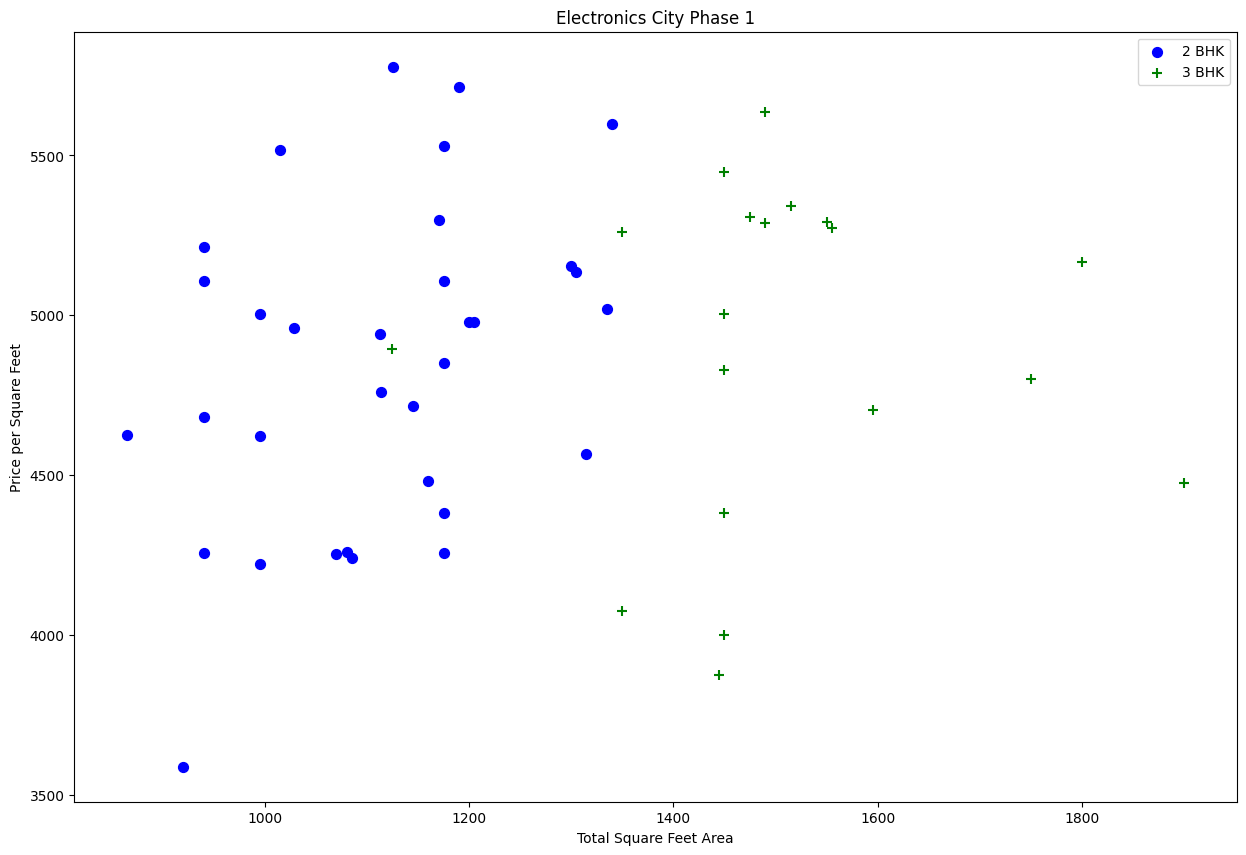

In [200]:

plot_scatter_chart(df1,'Electronics City Phase 1')

In [201]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['pps']),
                'std': np.std(bhk_df['pps']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            if bhk > 1:  # Ensure we're not trying to access 0 BHK
                stats = bhk_stats.get(bhk - 1)
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(
                        exclude_indices, 
                        bhk_df[bhk_df['pps'] < stats['mean']].index.values
                    )
    return df.drop(exclude_indices, axis='index')


In [202]:
df1=remove_bhk_outliers(df1)

In [203]:
df1.shape

(7342, 8)

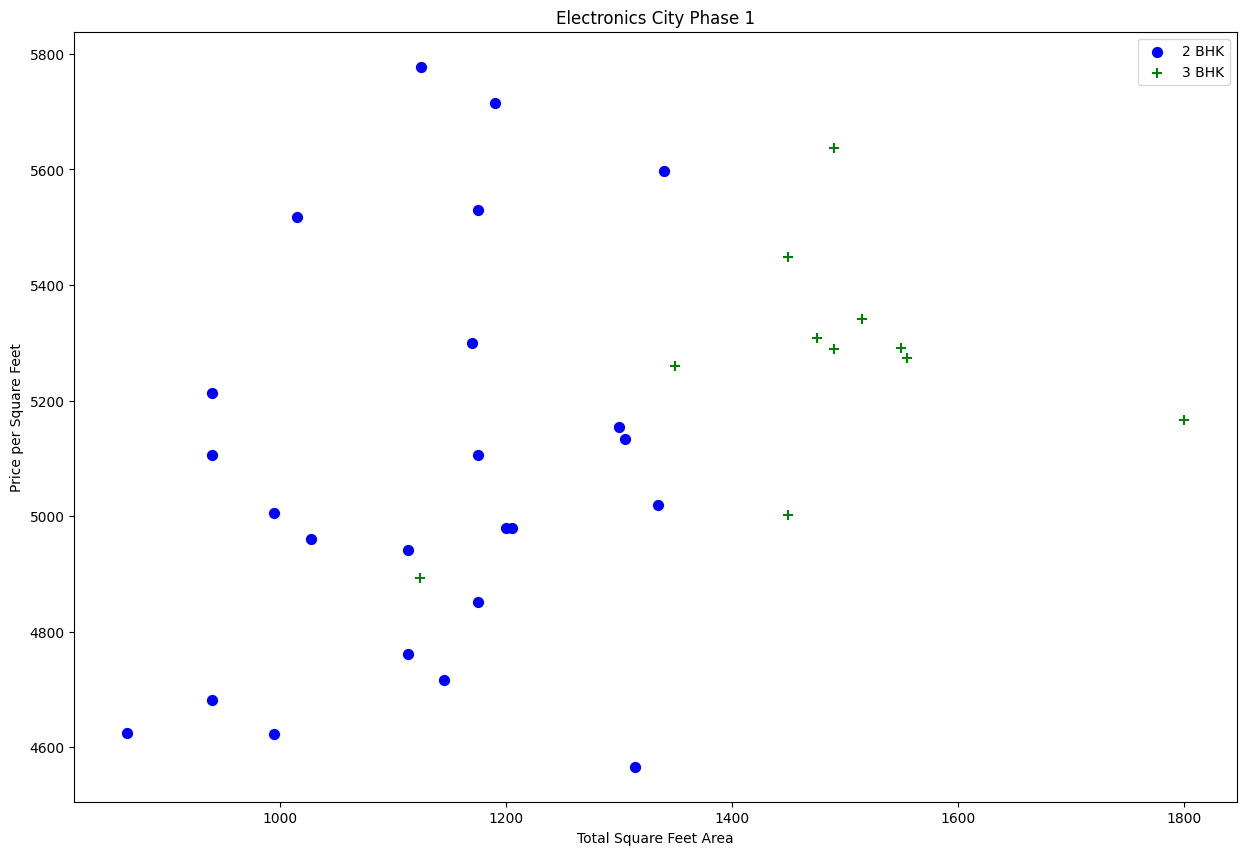

In [204]:

plot_scatter_chart(df1,'Electronics City Phase 1')

In [205]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
1,Devarachikkanahalli,2 BHK,1250,2.0,40.0,2,1250.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200,2.0,83.0,2,1200.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170,2.0,40.0,2,1170.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425,2.0,65.0,3,1425.0,4561.403509
5,Devarachikkanahalli,2 BHK,947,2.0,43.0,2,947.0,4540.654699


<Axes: xlabel='pps', ylabel='Count'>

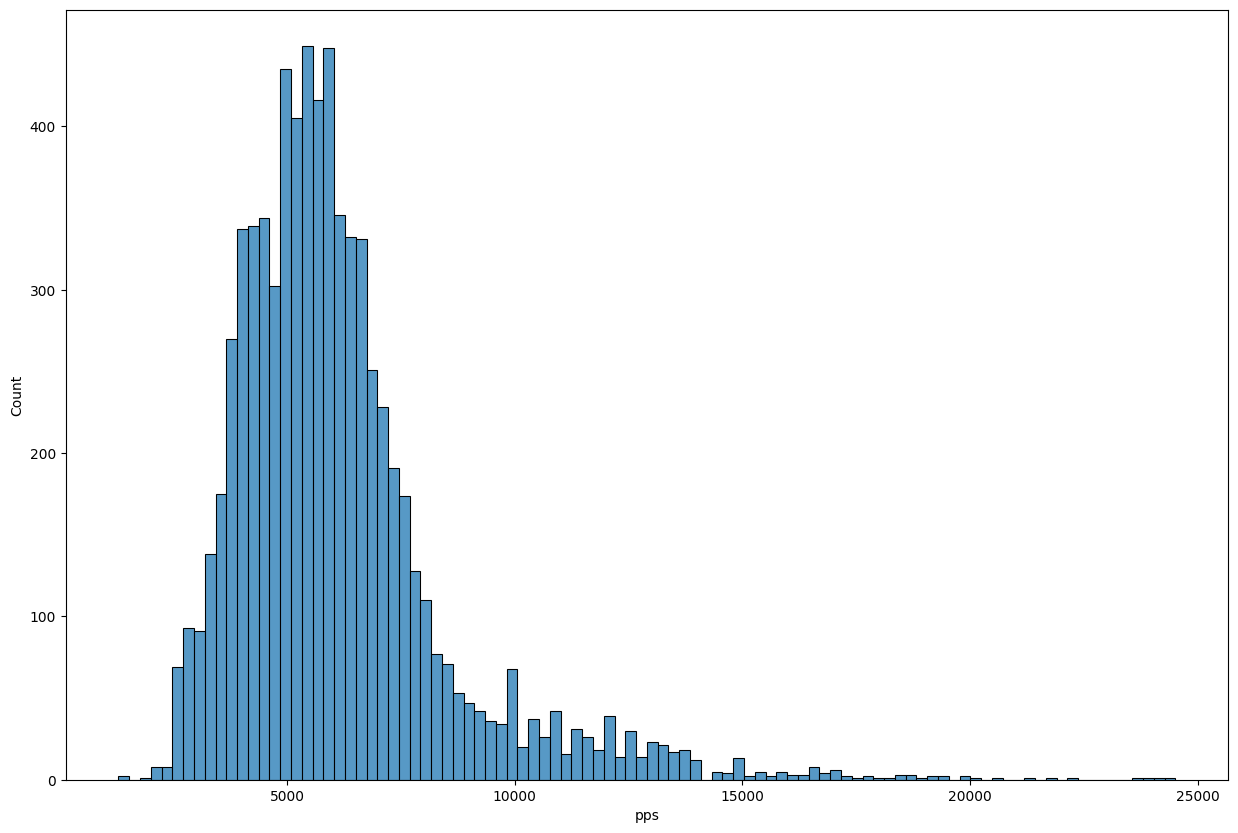

In [206]:
sns.histplot(data=df1,x="pps")

In [207]:
df1['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

(array([4.779e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

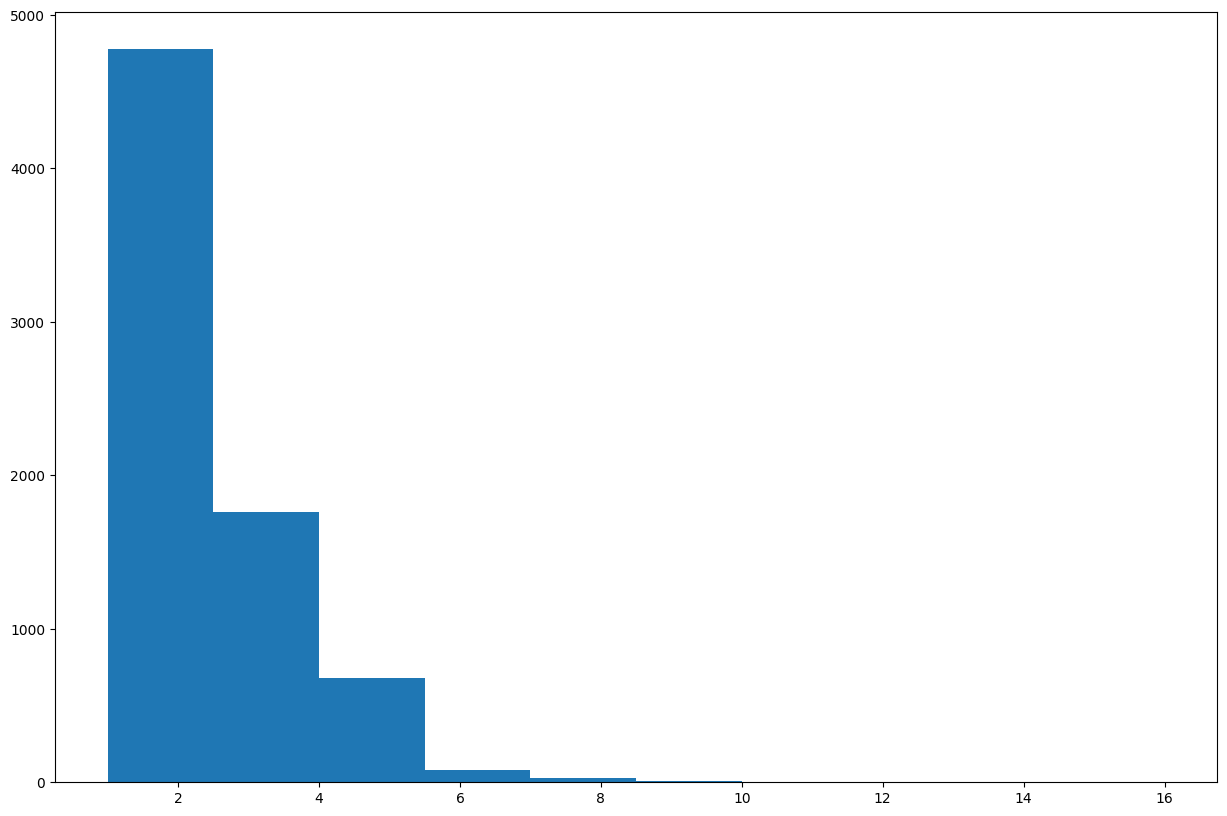

In [208]:
plt.hist(data=df1,x='bath')

In [209]:
len(df1[df1['bath']<df1['BHK']+2])

7264

In [210]:
df1=df1[df1['bath']<df1['BHK']+2]

In [211]:
df1.shape

(7264, 8)

In [212]:
df1.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps
1,Devarachikkanahalli,2 BHK,1250,2.0,40.0,2,1250.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200,2.0,83.0,2,1200.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170,2.0,40.0,2,1170.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425,2.0,65.0,3,1425.0,4561.403509
5,Devarachikkanahalli,2 BHK,947,2.0,43.0,2,947.0,4540.654699


In [225]:
dummies=pd.get_dummies(df1['location'])

dummies = dummies.astype(int)
dummies.head(3)


,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
df_new = pd.concat([df1, dummies.drop('other',axis='columns')], axis='columns')
df_new.head()

,location,size,total_sqft,bath,price,BHK,total_sqrt_con,pps,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2 BHK,1250,2.0,40.0,2,1250.0,3200.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2 Bedroom,1200,2.0,83.0,2,1200.0,6916.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2 BHK,1170,2.0,40.0,2,1170.0,3418.803419,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3 BHK,1425,2.0,65.0,3,1425.0,4561.403509,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2 BHK,947,2.0,43.0,2,947.0,4540.654699,1,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
df_new=df_new.drop('size',axis='columns')

In [230]:
df_new.head(1)

,location,total_sqft,bath,price,BHK,total_sqrt_con,pps,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250,2.0,40.0,2,1250.0,3200.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df_new=df_new.drop('total_sqft',axis='columns')

In [232]:
df_new=df_new.drop('location',axis='columns')

In [233]:
df_new.head(1)

,bath,price,BHK,total_sqrt_con,pps,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2.0,40.0,2,1250.0,3200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df_new=df_new.drop('pps',axis='columns')
df_new.head(1)

,bath,price,BHK,total_sqrt_con,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2.0,40.0,2,1250.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
X=df_new.drop('price',axis='columns')
y=df_new['price']

In [238]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [239]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7696224927822206

In [240]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Evaluate the model on the test data
score = rf_clf.score(X_test, y_test)
print(f"Random Forest model accuracy: {score}")


Random Forest model accuracy: 0.7637297012879558


In [242]:
df_new.shape

(7264, 245)